# Data Analysis Notebook

This data analysis notebook is an introductory method using static analysis and visualizations.

### Load Data

We select a dataset from the datasets folder.

In [1]:
import pandas as pd

# specify the folder where the datasets are stored
datasets_folder = 'datasets/'

# Specify the file path to the CSV file containing the data
file_path = datasets_folder + 'diabetes.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the top 5 rows of the DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
0,1,85,66,29,0,26.6,0.351,31,Negative
1,6,148,72,35,0,33.6,0.627,50,Positive
2,8,183,64,0,0,23.3,0.672,32,Positive
3,1,89,66,23,94,28.1,0.167,21,Negative
4,0,137,40,35,168,43.1,2.288,33,Positive


### Data Normalization

First we must normalize the data frame for all numerical values we utilize min-max normalzation.
To perform min-max normalization on a numerical variable, you can use the following formula:

Normalized Value = (Value - Min) / (Max - Min)


In [14]:
# Get the column names of the DataFrame
columns = df.columns

# remove the 'class' column
columns = columns.drop('class')

df_normalized = df.copy()
# min max normalization
df_normalized[columns] = (df[columns] - df[columns].min()) / (df[columns].max() - df[columns].min())

### Pairplot

We plot a pairplot to analyze binary comparison attribute distributions and scatterplots.

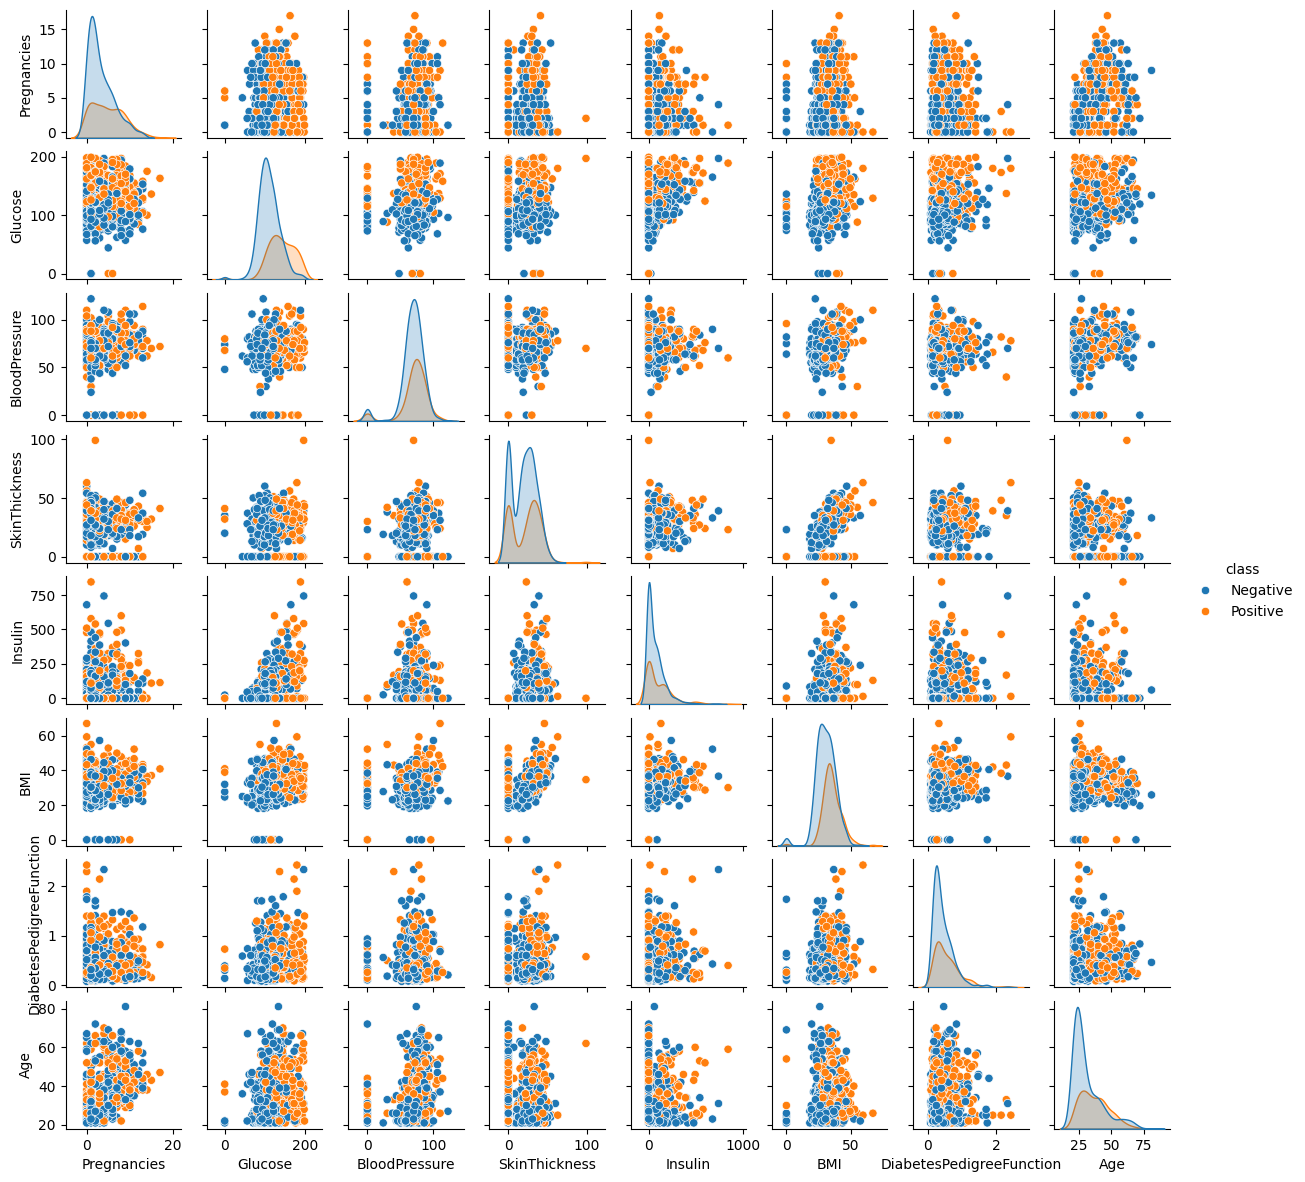

In [16]:
import seaborn as sns

# Create a pairplot of the DataFrame
sns.pairplot(df, hue='class', vars=columns, height=1.5)

### Parallel coordinates

We plot the data in a lossless General Line Coordinate method called Parallel coordinates.

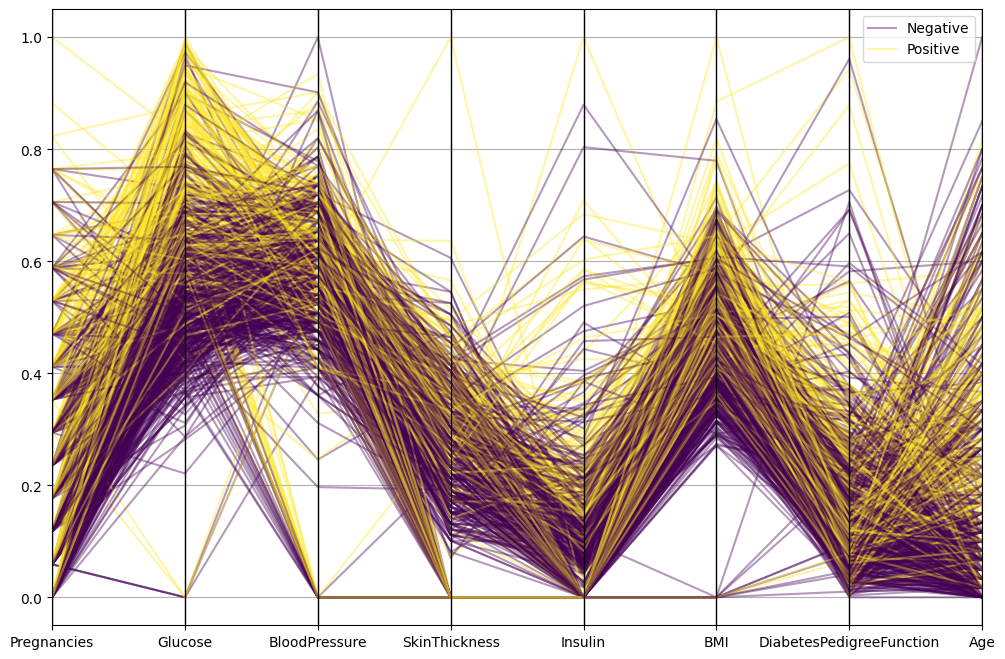

In [21]:
import matplotlib.pyplot as plt

# Set the figure size (width, height) in inches
plt.figure(figsize=(12, 8))

# Plot the DataFrame in normalized parallel coordinates
pd.plotting.parallel_coordinates(df_normalized, 'class', colormap='viridis', alpha=0.4)

# Display the plot
plt.show()


### Andrew's Curves

A variant of Parallel coordinates using Fourier series.

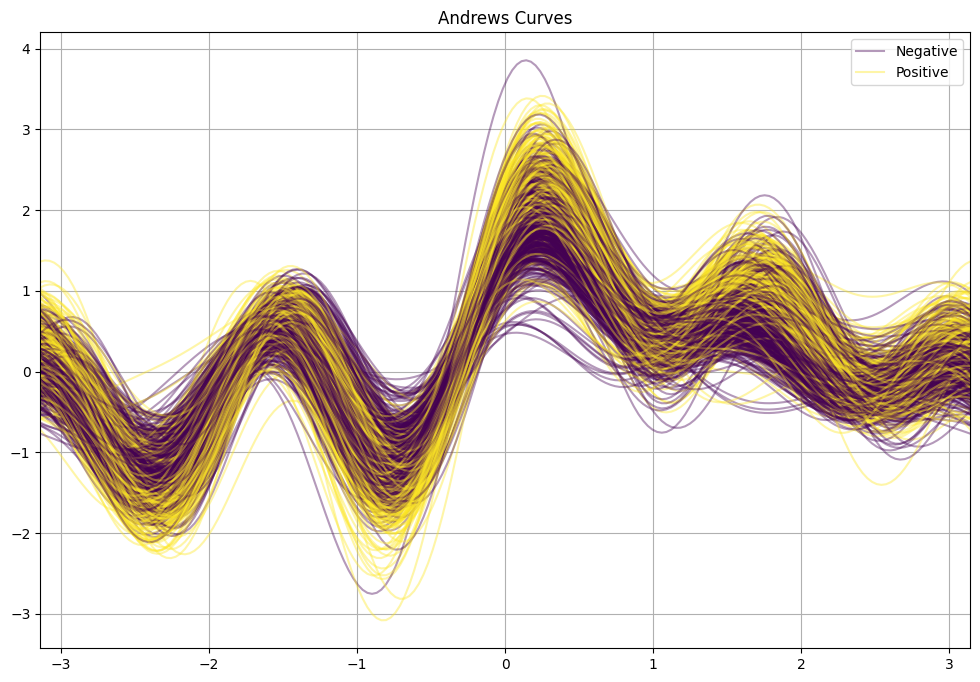

In [20]:
plt.figure(figsize=(12, 8))

# Plot the normalized DataFrame using Andrews Curves
pd.plotting.andrews_curves(df_normalized, 'class', colormap='viridis', alpha=0.4)

# Set the title of the plot
plt.title('Andrews Curves')

# Display the plot
plt.show()